In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()

In [3]:
hidden_nodes=50
df = pandas.read_excel('exp.xlsx', sheet_name='exp')
par=30
temp=df.values
print(temp)

[[  1.   170.     7.91]
 [  1.   170.     8.01]
 [  1.   170.     8.06]
 [  0.8  170.     7.57]
 [  0.8  170.     7.65]
 [  0.8  170.     7.65]
 [  0.8  170.     7.78]
 [  0.5  170.     6.79]
 [  0.5  170.     6.91]
 [  0.5  170.     6.98]
 [  0.3  170.     5.87]
 [  0.3  170.     6.02]
 [  0.3  170.     6.22]
 [  0.2  170.     5.09]
 [  0.2  170.     5.3 ]
 [  1.    68.     4.07]
 [  1.    68.     3.91]
 [  1.    68.     4.08]
 [  0.9   68.     3.98]
 [  0.8   68.     3.86]
 [  0.8   68.     3.9 ]
 [  0.8   68.     3.91]
 [  0.5   68.     3.44]
 [  0.5   68.     3.46]
 [  0.5   68.     3.54]
 [  0.3   68.     3.02]
 [  0.3   68.     3.07]
 [  0.3   68.     3.14]
 [  0.2   68.     2.48]
 [  0.2   68.     2.66]
 [  0.2   68.     2.78]
 [  1.    51.     3.15]
 [  1.    51.     3.17]
 [  1.    51.     3.23]
 [  0.9   51.     3.12]
 [  0.9   51.     3.12]
 [  0.9   51.     3.18]
 [  0.8   51.     3.06]
 [  0.8   51.     3.06]
 [  0.8   51.     3.06]
 [  0.8   51.     3.1 ]
 [  0.5   51.   

In [4]:
aaa=temp[:,2]

print(aaa)

[7.91 8.01 8.06 7.57 7.65 7.65 7.78 6.79 6.91 6.98 5.87 6.02 6.22 5.09
 5.3  4.07 3.91 4.08 3.98 3.86 3.9  3.91 3.44 3.46 3.54 3.02 3.07 3.14
 2.48 2.66 2.78 3.15 3.17 3.23 3.12 3.12 3.18 3.06 3.06 3.06 3.1  2.74
 2.74 2.8  2.38 2.41 2.5  2.2  2.2  2.25 2.13 2.09 2.11 2.15 1.92 1.95
 1.96 1.66 1.68 1.46]


In [5]:
aaa=aaa.reshape((-1,1))

print(aaa)

[[7.91]
 [8.01]
 [8.06]
 [7.57]
 [7.65]
 [7.65]
 [7.78]
 [6.79]
 [6.91]
 [6.98]
 [5.87]
 [6.02]
 [6.22]
 [5.09]
 [5.3 ]
 [4.07]
 [3.91]
 [4.08]
 [3.98]
 [3.86]
 [3.9 ]
 [3.91]
 [3.44]
 [3.46]
 [3.54]
 [3.02]
 [3.07]
 [3.14]
 [2.48]
 [2.66]
 [2.78]
 [3.15]
 [3.17]
 [3.23]
 [3.12]
 [3.12]
 [3.18]
 [3.06]
 [3.06]
 [3.06]
 [3.1 ]
 [2.74]
 [2.74]
 [2.8 ]
 [2.38]
 [2.41]
 [2.5 ]
 [2.2 ]
 [2.2 ]
 [2.25]
 [2.13]
 [2.09]
 [2.11]
 [2.15]
 [1.92]
 [1.95]
 [1.96]
 [1.66]
 [1.68]
 [1.46]]


In [6]:
# Preprocessing

scaler2.fit(aaa)

scaler1.fit(temp)

temp=scaler1.transform(temp)

print("temp:=", temp)

X= temp[:,range(0,2)]

print("X:=", X)

y= temp[:,2]

print("y:=", y)

# Splitting of data

X_train, X_test = X[:par], X[par:]
y_train, y_test = y[:par], y[par:]

df = pandas.read_excel('sim.xlsx', sheet_name='sim')
temp=df.values

temp:= [[1.         1.         0.97727273]
 [1.         1.         0.99242424]
 [1.         1.         1.        ]
 [0.75       1.         0.92575758]
 [0.75       1.         0.93787879]
 [0.75       1.         0.93787879]
 [0.75       1.         0.95757576]
 [0.375      1.         0.80757576]
 [0.375      1.         0.82575758]
 [0.375      1.         0.83636364]
 [0.125      1.         0.66818182]
 [0.125      1.         0.69090909]
 [0.125      1.         0.72121212]
 [0.         1.         0.55      ]
 [0.         1.         0.58181818]
 [1.         0.25       0.39545455]
 [1.         0.25       0.37121212]
 [1.         0.25       0.3969697 ]
 [0.875      0.25       0.38181818]
 [0.75       0.25       0.36363636]
 [0.75       0.25       0.36969697]
 [0.75       0.25       0.37121212]
 [0.375      0.25       0.3       ]
 [0.375      0.25       0.3030303 ]
 [0.375      0.25       0.31515152]
 [0.125      0.25       0.23636364]
 [0.125      0.25       0.24393939]
 [0.125      0.25    

In [7]:
aaa=temp[:,2]
aaa=aaa.reshape((-1,1))
scaler4.fit(aaa)
temp=scaler3.fit_transform(temp)
temp=temp[:,2]
y_sim=temp[:par]
ytest_sim=temp[par:]

In [8]:
# MLP regressor 

mlp= MLPRegressor(hidden_layer_sizes=(hidden_nodes,hidden_nodes),  activation='relu', solver='adam',    alpha=0.0001,batch_size='auto',
               learning_rate='constant', learning_rate_init=1e-4, power_t=0.5, max_iter=10000, shuffle=True,
               random_state=None, tol=1e-5, verbose=True, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.08011127
Iteration 2, loss = 0.07873691
Iteration 3, loss = 0.07737900
Iteration 4, loss = 0.07603715
Iteration 5, loss = 0.07471163
Iteration 6, loss = 0.07340323
Iteration 7, loss = 0.07211138
Iteration 8, loss = 0.07083573
Iteration 9, loss = 0.06957731
Iteration 10, loss = 0.06833635
Iteration 11, loss = 0.06711306
Iteration 12, loss = 0.06590763
Iteration 13, loss = 0.06472361
Iteration 14, loss = 0.06357137
Iteration 15, loss = 0.06243767
Iteration 16, loss = 0.06132218
Iteration 17, loss = 0.06022790
Iteration 18, loss = 0.05917052
Iteration 19, loss = 0.05813202
Iteration 20, loss = 0.05711228
Iteration 21, loss = 0.05611122
Iteration 22, loss = 0.05512863
Iteration 23, loss = 0.05416425
Iteration 24, loss = 0.05321857
Iteration 25, loss = 0.05229089
Iteration 26, loss = 0.05138065
Iteration 27, loss = 0.05048948
Iteration 28, loss = 0.04962412
Iteration 29, loss = 0.04879170
Iteration 30, loss = 0.04797615
Iteration 31, loss = 0.04717724
Iteration 32, los

In [9]:
# Adaptive weight assignment

wsim=y_train*0
wnn=y_train*0
y_predict=mlp.predict(X_train)

for i in range(len(y_train)):
    if y_train[i] >y_predict[i] and y_train[i]>y_sim[i]:
        if y_predict[i] >y_sim[i]:
            wsim[i]=0
            wnn[i]=1
        else:
            wsim[i]=1
            wnn[i]=0
    elif y_train[i] <y_predict[i] and y_train[i]<y_sim[i]:
        if y_predict[i] > y_sim[i]:
            wsim[i]=1
            wnn[i]=0
        else:
            wsim[i]=0
            wnn[i]=1
    elif y_train[i]==y_predict[i] :
        wsim[i]=0
        wnn[i]=1
    
    elif y_train[i]==y_sim[i]:
        wsim[i]=1
        wnn[i]=0
    
    else:
        wsim[i]=abs(y_predict[i]-y_train[i])/abs(y_predict[i]-y_sim[i])
        wnn[i]=abs(y_sim[i]-y_train[i])/abs(y_predict[i]-y_sim[i])
        

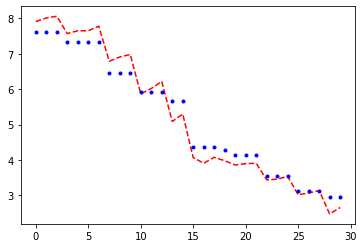

In [10]:
t = np.arange(0, len(y_train),1)

plt.figure(1)

plt.plot(t, scaler2.inverse_transform(y_train.reshape(-1,1)), 'r--', 
         t, scaler2.inverse_transform(y_predict.reshape(-1,1)), 'b.')
plt.show()

In [11]:
# Two more MLP models 

#For evaluating wsim and wnn weights dependence on input values X_train


mlpRwsim = MLPRegressor(hidden_layer_sizes=(hidden_nodes,hidden_nodes), max_iter=10000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=1e-4)



mlpRwnn = MLPRegressor(hidden_layer_sizes=(hidden_nodes,hidden_nodes), max_iter=10000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=1e-4)

mlpRwsim.fit(X_train, wsim)
wsim_predict=mlpRwsim.predict(X_train)
wsim_test_predict=mlpRwsim.predict(X_test)
mlpRwnn.fit(X_train, wnn)
wnn_predict=mlpRwnn.predict(X_train)
wnn_test_predict=mlpRwnn.predict(X_test)

Iteration 1, loss = 0.07873080
Iteration 2, loss = 0.07820306
Iteration 3, loss = 0.07768607
Iteration 4, loss = 0.07718133
Iteration 5, loss = 0.07668889
Iteration 6, loss = 0.07620570
Iteration 7, loss = 0.07573231
Iteration 8, loss = 0.07526858
Iteration 9, loss = 0.07481421
Iteration 10, loss = 0.07435293
Iteration 11, loss = 0.07391314
Iteration 12, loss = 0.07348455
Iteration 13, loss = 0.07306574
Iteration 14, loss = 0.07265655
Iteration 15, loss = 0.07225835
Iteration 16, loss = 0.07186844
Iteration 17, loss = 0.07148662
Iteration 18, loss = 0.07111263
Iteration 19, loss = 0.07074625
Iteration 20, loss = 0.07038720
Iteration 21, loss = 0.07003522
Iteration 22, loss = 0.06969675
Iteration 23, loss = 0.06937103
Iteration 24, loss = 0.06905034
Iteration 25, loss = 0.06873472
Iteration 26, loss = 0.06842408
Iteration 27, loss = 0.06811829
Iteration 28, loss = 0.06781717
Iteration 29, loss = 0.06752052
Iteration 30, loss = 0.06722816
Iteration 31, loss = 0.06693988
Iteration 32, los

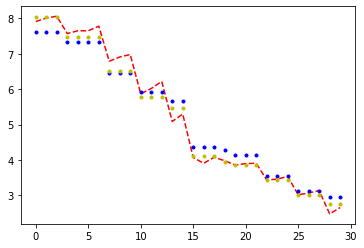

In [12]:
# AWNN Prediction on  X_train values

yf_predict=y_predict*wnn_predict+y_sim*wsim_predict
plt.figure(2)
plt.plot(t, scaler2.inverse_transform(y_train.reshape(-1,1)), 
         'r--', t, scaler2.inverse_transform(y_predict.reshape(-1,1)), 'b.', 
         t, scaler2.inverse_transform(yf_predict.reshape(-1,1)), 'y.')
plt.show()

0.011097139325693032
0.0011571321596215648


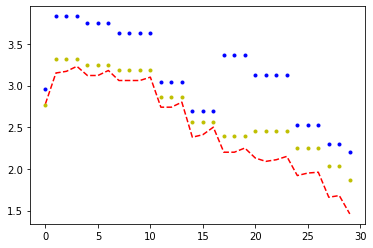

In [13]:
# AWNN Prediction on  X_test values

ytest_predict=mlp.predict(X_test)
yftest_predict=ytest_predict*wnn_test_predict+ytest_sim*wsim_test_predict
t = np.arange(0, len(y_test),1)
plt.figure(3)
plt.plot(t, scaler2.inverse_transform(y_test.reshape(-1,1)), 'r--', 
         t, scaler2.inverse_transform(ytest_predict.reshape(-1,1)), 'b.', 
         t, scaler2.inverse_transform(yftest_predict.reshape(-1,1)), 'y.')

print (mean_squared_error(y_test.reshape(-1,1), ytest_predict.reshape(-1,1) )  )
print (mean_squared_error(y_test.reshape(-1,1), yftest_predict.reshape(-1,1) ) )

In [14]:
np.savetxt("foo.csv", t, delimiter=",")
np.savetxt("foo1.csv", y_test, delimiter=",")
np.savetxt("foo2.csv", ytest_predict, delimiter=",")
np.savetxt("foo3.csv", yftest_predict, delimiter=",")

plt.show()